# Least Significant Bit (LSB)

In [2]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

# get required images
if not os.path.isdir('Images'):
    !wget -O watermarking-images.zip "https://drive.google.com/uc?export=download&id=1GOz-jcICYEFZwMgzZdNEP3j7ZMDXIOuo"
    !unzip watermarking-images.zip

## Embedding

In [3]:
# Read image and mark
im = cv2.imread('../Images/lena.bmp', 0)
print('Image shape: ', im.shape)

wat = cv2.imread('../Images/mark.png', 0)
print('Watermark shape: ', wat.shape)

Image shape:  (512, 512)
Watermark shape:  (512, 512)


In [4]:
# Flatted the images for easy embedding
res_flat = im.flatten()
wat_flat = wat.flatten()

N = res_flat.shape[0]

# Example of decoded pixel value
pixel = format(res_flat[0], "08b")
print(pixel)
print(type(pixel))

10100000
<class 'str'>


In [5]:
# Embedding
for i in range(N):
    im_pixel_to_binary = format(res_flat[i], "08b")
    wat_pixel_to_binary = format(wat_flat[i], "08b")

    # concate all the pixels until the LSB from the image
    # and the MSB of the watermark as LSB
    res_pixel = im_pixel_to_binary[:7] + wat_pixel_to_binary[0]

    res_flat[i] = int(res_pixel, 2)


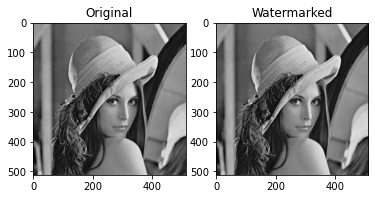

True

In [6]:
# Reshape image
res = res_flat.reshape(512, 512)

# Show images side by side
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Watermarked')
plt.imshow(res, cmap='gray')
plt.show()

# save image
#res = Image.fromarray(res)
#res.save('watermarked.bmp')
cv2.imwrite('watermarked.bmp', res)

## Quality

There are several ways to compute the quality of an image.

One of the most common is the Peak Signal to Noise Ratio (PSNR)

$PSNR = 10 \cdot log_{10} \frac{V_{max}^2}{MSE}$

In [7]:
# Compute PSNR
psnr = cv2.PSNR(im, res)
print('PSNR: %.2fdB' % psnr)

PSNR: 51.15dB


## Detection

In [8]:
# Read the watermarked image and flatten it
watermarked = cv2.imread('watermarked.bmp', 0)
watermarked = watermarked.flatten()

# Create empy flatten image
N = watermarked.shape[0]
extracted = np.zeros(N)

for i in range(N):
    extracted[i] = int(format(watermarked[i], "08b")[-1], 2)

# Reshape extracted image
extracted = extracted.reshape(512, 512)

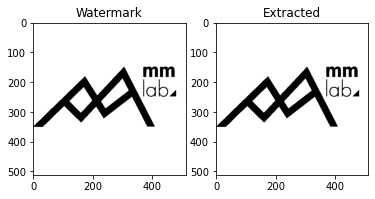

In [9]:
# Read original watermark
mark = cv2.imread('../Images/mark.png', 0)

# Show marks side by side
plt.subplot(121)
plt.title('Watermark')
plt.imshow(mark, cmap='gray')
plt.subplot(122)
plt.title('Extracted')
plt.imshow(extracted, cmap='gray')
plt.show()

## Exercises

1. Try to change the layer in which you insert the image and see how it impacts the PSNR and the WPSNR

2. Compute the mean PSNR and WPSNR for 5 images in different layers. Examples
of expected results:

|   LAYER   |  PSNR |
|-----------|-------|
| 7 (LSB)   | 51.14 |
| 2         | 21.32 |
| 4         | 33.13 |

3. Use the MSB (Most Significant Bit) of an image as watermark. 
(Hint: use img.convert('1') to get a black and white image with only one color layer)

4. Use a smaller watermark (e.g. 64x64) and try different positions

5. Apply different attacks to see how these affect the quality of the watermarked
image and extracted watermark

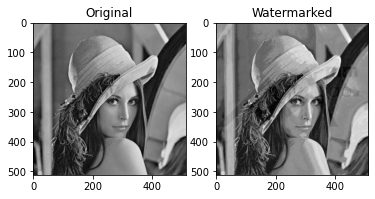

PSNR: 27.24dB


In [10]:
_res_flat = im.flatten()
_wat_flat = wat.flatten()

# Embedding
for i in range(N):
    _im_pixel_to_binary = format(_res_flat[i], "08b")
    _wat_pixel_to_binary = format(_wat_flat[i], "08b")

    # concate all the pixels until the LSB from the image
    # and the MSB of the watermark as LSB
    _res_pixel = _im_pixel_to_binary[:3] + _wat_pixel_to_binary[0] + _im_pixel_to_binary[4:]

    res_flat[i] = int(_res_pixel, 2)

# Reshape image
_res = res_flat.reshape(512, 512)

# Show images side by side
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Watermarked')
plt.imshow(_res, cmap='gray')
plt.show()

# Compute PSNR
psnr = cv2.PSNR(im, _res)
print('PSNR: %.2fdB' % psnr)